In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
reviews = pd.read_csv("IMDB dataset.csv")

In [3]:
reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
reviews.shape      #dimensions of our dataset

(50000, 2)

In [5]:
reviews.dtypes        #datatypes of our columns

review       object
sentiment    object
dtype: object

**Both Columns have object datatypes which is true**

# VISUALIZATION BEFORE DATA PREPROCESSING:-

**BARPLOT :-** 

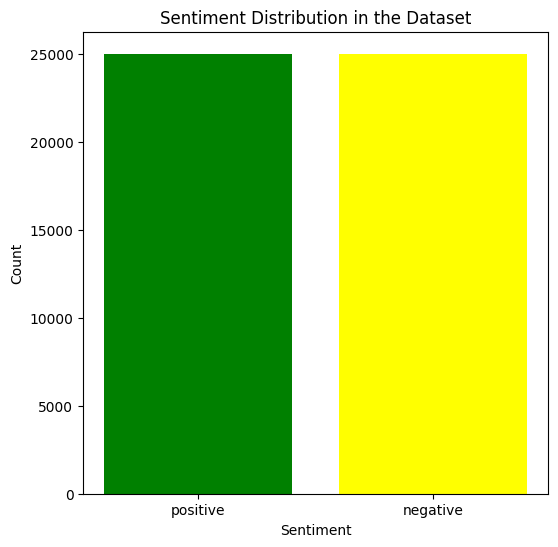

In [6]:
sentiment_counts = reviews['sentiment'].value_counts()

# Create a bar plot to visualize the sentiment distribution
plt.figure(figsize=(6, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'yellow'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution in the Dataset')
plt.show()

Both Positive and Negative sentiments are equally there in our dataset

**PIE CHART :-**

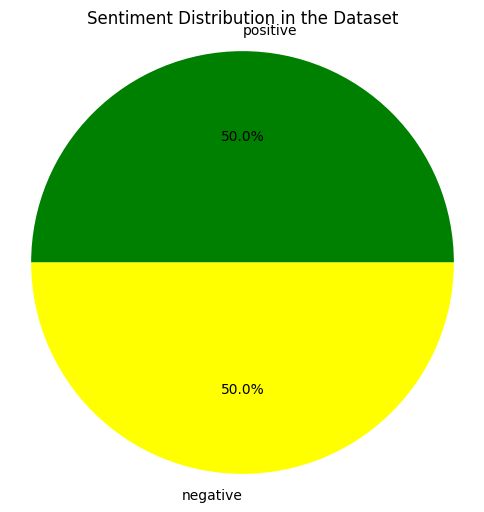

In [7]:
sentiment_counts = reviews['sentiment'].value_counts()

# Create a pie chart to visualize the sentiment distribution
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['green', 'yellow'])
plt.title('Sentiment Distribution in the Dataset')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.
plt.show()

In [8]:
# Get the count of negative and positive reviews
num_negative_reviews = sentiment_counts['negative']
num_positive_reviews = sentiment_counts['positive']

print("Total number of negative reviews:", num_negative_reviews)
print("Total number of positive reviews:", num_positive_reviews)

Total number of negative reviews: 25000
Total number of positive reviews: 25000


In [9]:
reviews.isnull().sum()             #checking the null values in our dataset

review       0
sentiment    0
dtype: int64

No null values are there in our dataset

In [10]:
reviews["sentiment"].unique()          #checks the unique values in a particular column

array(['positive', 'negative'], dtype=object)

***Since Sentiment column is nominal data which has 2 distinct categories positive and negative*** 

***So, we can convert nominal data into numeric data type***

In [11]:
sentiment_mapping = {
    'positive': 1,
    'negative': 0
}

# Apply label encoding to the 'sentiment' column
reviews['sentiment_numeric'] = reviews['sentiment'].map(sentiment_mapping)

In [12]:
reviews.head()

,review,sentiment,sentiment_numeric
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


**positive => 1**

**negative => 0**

# Preprocessing :-

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

In [14]:


# Function to preprocess text
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    
      # Remove HTML tags
    text = re.sub('<.*?>', '', text)

    # Remove <br> tags
    text = text.replace('<br>', '')

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]    #filtering of stopwords

    # Remove special characters and punctuation
    tokens = [token for token in tokens if token.isalnum()]          #filtering of special characters and punctuations

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    # Reconstruct the preprocessed text
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Preprocess the 'review' column
reviews['preprocessed_review'] = reviews['review'].apply(preprocess_text)

In [15]:
reviews.head()

,review,sentiment,sentiment_numeric,preprocessed_review
0,One of the other reviewers has mentioned that ...,positive,1,one review mention watch 1 oz episod hook righ...
1,A wonderful little production. <br /><br />The...,positive,1,wonder littl product film techniqu fashion giv...
2,I thought this was a wonderful way to spend ti...,positive,1,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,0,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,petter mattei love time money visual stun film...


 ***Review before Preprocessing:-***

In [16]:
print(reviews['review'].iloc[0])      

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

***Review after Preprocessing:-***

In [17]:
print(reviews['preprocessed_review'].iloc[0])

one review mention watch 1 oz episod hook right exactli happen first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far would say main appeal show due fact goe show would dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal could say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch darker side


***Checking duplicate entries:-***

In [18]:
# Find duplicate entries based on the 'preprocessed_review' column
duplicate_reviews = reviews[reviews.duplicated(subset='preprocessed_review', keep=False)]

# Display the duplicate entries
print(duplicate_reviews[['preprocessed_review', 'sentiment']])


                                     preprocessed_review sentiment
42     film seen one rage got one worst yet direct lo...  negative
84     brought film joke friend could worst joke play...  negative
140    begin let get someth chest huge fan john eyr f...  negative
219    ed wood ride fact movi made give youngaspir fi...  negative
245    seen film least 100 time still excit act perfe...  positive
...                                                  ...       ...
49912  incred piec drama power hit found film great g...  positive
49950  brief episod appear one night galleri show bac...  negative
49984  hello derrick cannon welcom first ever cannoni...  negative
49986  movi disgrac major leagu franchis live minneso...  negative
49991  le visiteur first movi mediev time travel actu...  negative

[836 rows x 2 columns]


In [19]:
total_duplicates = reviews.duplicated(subset='preprocessed_review', keep=False).sum()

# Display the count of total duplicates
print("Total duplicates:", total_duplicates)

Total duplicates: 836


**Dimensions of our dataset before preprocessing:-**

In [20]:
reviews.shape

(50000, 4)

In [21]:

# Remove duplicates based on the 'preprocessed_review' column
reviews.drop_duplicates(subset='preprocessed_review', inplace=True)


**Dimensions of our dataset after preprocessing:-**

In [22]:
reviews.shape

(49576, 4)

In [23]:
reviews.head()

,review,sentiment,sentiment_numeric,preprocessed_review
0,One of the other reviewers has mentioned that ...,positive,1,one review mention watch 1 oz episod hook righ...
1,A wonderful little production. <br /><br />The...,positive,1,wonder littl product film techniqu fashion giv...
2,I thought this was a wonderful way to spend ti...,positive,1,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,0,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,petter mattei love time money visual stun film...


**Dropping review column because it has no use since we have preprocessed_review column :-**

In [24]:
# Drop the 'review' column
reviews.drop('review', axis=1, inplace=True)

In [25]:
reviews.head()

,sentiment,sentiment_numeric,preprocessed_review
0,positive,1,one review mention watch 1 oz episod hook righ...
1,positive,1,wonder littl product film techniqu fashion giv...
2,positive,1,thought wonder way spend time hot summer weeke...
3,negative,0,basic famili littl boy jake think zombi closet...
4,positive,1,petter mattei love time money visual stun film...


# VISUALIZATION AFTER DATA PREPROCESSING:-

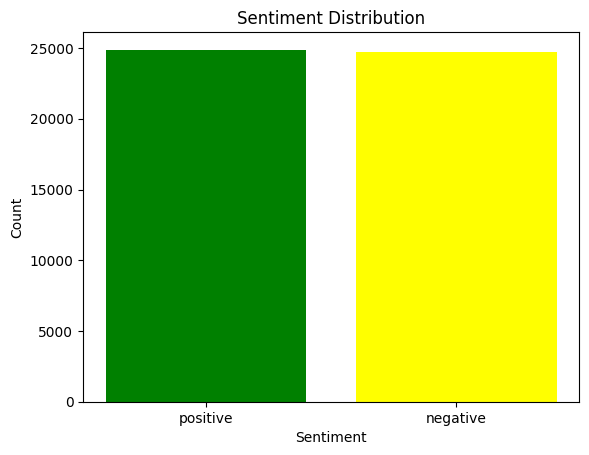

In [26]:
sentiment_counts = reviews['sentiment'].value_counts()

# Create a bar plot to visualize sentiment distribution
plt.bar(sentiment_counts.index, sentiment_counts.values , color=['green', 'yellow'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

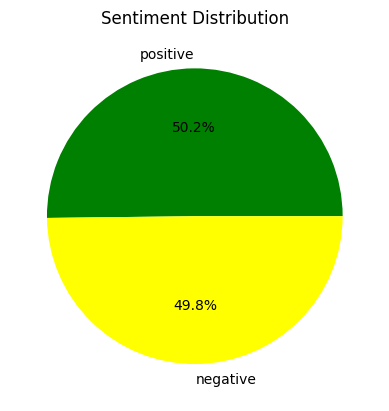

In [27]:
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%' , colors=['green', 'yellow'])
plt.title('Sentiment Distribution')
plt.show()

After Preprocessing our dataset now has more positive reviews than negative reviews.

In [28]:
from collections import Counter

# Separate positive and negative reviews
positive_reviews = reviews[reviews['sentiment'] == 'positive']
negative_reviews = reviews[reviews['sentiment'] == 'negative']

# Create a Counter object for positive reviews
positive_word_counter = Counter(' '.join(positive_reviews['preprocessed_review']).split())

# Create a Counter object for negative reviews
negative_word_counter = Counter(' '.join(negative_reviews['preprocessed_review']).split())

# Get the most common 10 words for positive reviews
most_common_positive_words = positive_word_counter.most_common(10)

# Get the most common 10 words for negative reviews
most_common_negative_words = negative_word_counter.most_common(10)

# Display the most common words for positive reviews
print("Most Common Words Used in Positive Reviews:")
for word, count in most_common_positive_words:
    print(f"{word}: {count}")

# Display the most common words for negative reviews
print("\nMost Common Words Used in Negative Reviews:")
for word, count in most_common_negative_words:
    print(f"{word}: {count}")


Most Common Words Used in Positive Reviews:
film: 49179
movi: 43262
one: 27027
like: 19899
time: 15537
see: 14679
good: 14615
stori: 13687
charact: 13635
make: 13123

Most Common Words Used in Negative Reviews:
movi: 55776
film: 42885
one: 25591
like: 23755
make: 15282
even: 15060
would: 15046
get: 14987
watch: 14457
time: 14301


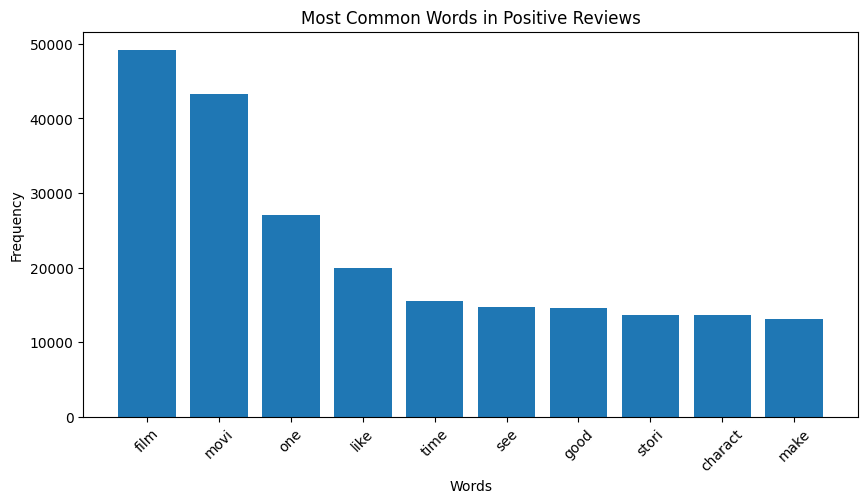

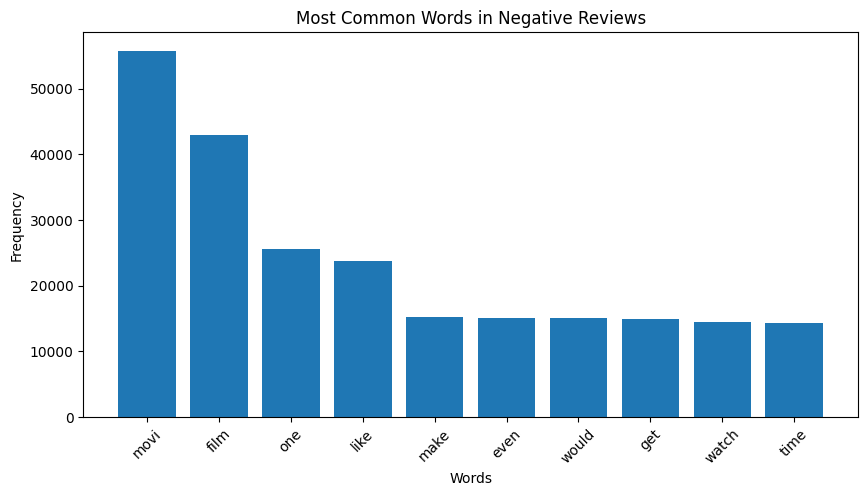

In [29]:
# Visualize most common words in positive reviews
plt.figure(figsize=(10, 5))
plt.bar([word[0] for word in most_common_positive_words], [count[1] for count in most_common_positive_words])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Positive Reviews')
plt.xticks(rotation=45)
plt.show()

# Visualize most common words in negative reviews
plt.figure(figsize=(10, 5))
plt.bar([word[0] for word in most_common_negative_words], [count[1] for count in most_common_negative_words])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Negative Reviews')
plt.xticks(rotation=45)
plt.show()


# Marking Target and Predictor Variable:-

In [30]:
X = reviews['preprocessed_review']    #predictor variable

In [31]:
y = reviews['sentiment_numeric']                #target variable

In [32]:
X.head()

0    one review mention watch 1 oz episod hook righ...
1    wonder littl product film techniqu fashion giv...
2    thought wonder way spend time hot summer weeke...
3    basic famili littl boy jake think zombi closet...
4    petter mattei love time money visual stun film...
Name: preprocessed_review, dtype: object

In [33]:
y.head()

0    1
1    1
2    1
3    0
4    1
Name: sentiment_numeric, dtype: int64

# Splitting the dataset for training and testing:-

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
X_train.shape

(39660,)

In [37]:
X_test.shape

(9916,)

# TF-IDF vectorization :- 

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
# Convert text data to numerical features using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [40]:
from sklearn.metrics import accuracy_score, classification_report #Accuracy score and classification report 

# Logistic Regression :-

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
classifier = LogisticRegression()
classifier.fit(X_train_tfidf, y_train)

LogisticRegression()

In [43]:
y_pred = classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.88


In [44]:
print("Classification Report:")  #summary of the performance of a classification model on a set of test data.
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      4939
           1       0.87      0.91      0.89      4977

    accuracy                           0.88      9916
   macro avg       0.89      0.88      0.88      9916
weighted avg       0.89      0.88      0.88      9916



# Naive_bayes model :-

In [45]:
from sklearn.naive_bayes import MultinomialNB

In [46]:
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [47]:
y_pred = classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.86


In [48]:
print("Classification Report:")         #summary of the performance of a classification model on a set of test data.
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4939
           1       0.86      0.86      0.86      4977

    accuracy                           0.86      9916
   macro avg       0.86      0.86      0.86      9916
weighted avg       0.86      0.86      0.86      9916



In [49]:
from joblib import dump

In [50]:
dump(classifier, './../savedmodels/classifier.joblib')
dump(vectorizer, './../savedmodels/vectorizer.joblib')

['./../savedmodels/vectorizer.joblib']